In [3]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import json
from nltk.translate.bleu_score import sentence_bleu
import pandas as pd
import json

# Multi-duration captioning

We use the captioning model from [mzhangyb/self-critical.pytorch](https://github.com/mzhangyb/self-critical.pytorch), based on the paper ["Discriminability objective for training descriptive captions"](http://openaccess.thecvf.com/content_cvpr_2018/papers/Luo_Discriminability_Objective_for_CVPR_2018_paper.pdf) by Luo et al. We create multi-duration captions by generating captions for the visualizations from our multi-duration rendering pipline.

## Instructions

1. Ensure that you have initialized submodules (`git submodule update --init`) 
2. If you have not yet done so, go through the rendering notebook in this folder (`applications/rendering.ipynb`) to generate the images that are input into the captioning module. 
3. Download the captioning model and the associated infos pkl file [from this link](https://drive.google.com/drive/folders/0B7fNdx_jAqhtT3pBQlR6emJXM1U). 
4. Adjust the data and prediction paths in the cell below.
5. Run notebook to generate predictions. 

## TODO: fill in paths below

In [10]:
# folder where the results of the rendering notebook are saved
input_path = os.path.abspath('render_results')
# path where you saved the captioning model; 
caption_model_path = os.path.abspath('model-best.pth')
# path where you saved the infos file from the captioning model
infos_path = os.path.abspath('infos_td-best.pkl')
# number of results to show
n_results_to_show = 10

## Download captioning model

## Setup 

In [5]:
time_points = [0, 500, 3000, 5000]

In [6]:
all_img = [f for f in sorted(os.listdir(input_path)) if (f.endswith('.jpg') or f.endswith('.png') and not f.startswith('.'))]
img2idx = {f:i for i,f in enumerate(all_img)}
img_sets = list(set(['_'.join(f.split('_')[1:]) for f in all_img]))

## Generate captions

In [8]:
# follow the instructions on https://github.com/mzhangyb/self-critical.pytorch#generate-image-captions
# for downloading models and COCO captions
!cd self-critical.pytorch/; python eval.py --model "{caption_model_path}" --infos_path "{infos_path}" --image_folder "{input_path}" --num_images -1 --beam_size=5

DataLoaderRaw loading images from folder:  /home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results
0
listing all images in directory /home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results
DataLoaderRaw found  2348  images
/usr/lib/python2.7/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
a little girl brushing her teeth with a toothbrush
a young boy brushing her teeth with a toothbrush
a young girl brushing her teeth with a toothbrush
a little girl brushing his teeth with a toothbrush
a young boy brushing his teeth with a toothbrush
--------------------
a man is holding a frisbee in the street
a man is holding a frisbee in his hand
a man holding a frisbee in his hand
a man is holding a skateboard in the street
a man holding a frisbee in the street
--------------------
a man riding a horse jumping over a

image 16: a group of people standing on a boat in the water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_065.jpg" vis/imgs/img17.jpg
image 17: a man taking a picture of a boat in the water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_067.jpg" vis/imgs/img18.jpg
image 18: a group of people sitting on a boat in the water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_071.jpg" vis/imgs/img19.jpg
image 19: a group of people sitting in a boat in the water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_075.jpg" vis/imgs/img20.jpg
image 20: a sail boat is sitting in the water
evaluating validation preformance... 19/2348 (0.000000)
a sailboat is sitting in the water
a sail sail boat in the water
a sail boat is sitting in the water
a sail sail sail boat in the water
a sailboat is sitting in

image 33: a group of people standing in an airport with a tennis
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_141.jpg" vis/imgs/img34.jpg
image 34: a group of people playing tennis on a court
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_145.jpg" vis/imgs/img35.jpg
image 35: a group of people standing in a field with a frisbee
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_147.jpg" vis/imgs/img36.jpg
image 36: a group of people playing with a tennis ball
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_149.jpg" vis/imgs/img37.jpg
image 37: a group of people sitting on a skateboard
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_153.jpg" vis/imgs/img38.jpg
image 38: a man playing with a tennis ball on a court
cp "/home/anelise/Dropbox (

image 51: a black dog laying on top of a bed
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000014966.jpg" vis/imgs/img52.jpg
image 52: a man doing a trick on a skateboard in the air
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000014986.jpg" vis/imgs/img53.jpg
image 53: a cell phone sitting on top of a car
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000015165.jpg" vis/imgs/img54.jpg
image 54: a computer keyboard sitting on top of a desk
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000018214.jpg" vis/imgs/img55.jpg
image 55: a dog walking down a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000018780.jpg" vis/imgs/img56.jpg
image 56: two pizzas sitting on top of a table
cp "/home/anelise/Dropbox (MIT)

image 71: a red bus driving down a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000040100.jpg" vis/imgs/img72.jpg
image 72: a young boy holding a baseball bat in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000041138.jpg" vis/imgs/img73.jpg
image 73: a group of people standing next to a train station
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000045524.jpg" vis/imgs/img74.jpg
image 74: a group of people standing on a tennis court
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000046149.jpg" vis/imgs/img75.jpg
image 75: a group of people riding on the back of horses
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000048001.jpg" vis/imgs/img76.jpg
image 76: a living room with a couch and a tv
cp 

image 91: a wooden table with a bowl of food on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000068788.jpg" vis/imgs/img92.jpg
image 92: a woman standing in front of a bunch of oranges
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000070104.jpg" vis/imgs/img93.jpg
image 93: a red and white bus driving down a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000072133.jpg" vis/imgs/img94.jpg
image 94: a yellow fire hydrant on the side of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000073413.jpg" vis/imgs/img95.jpg
image 95: a red double decker bus driving down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000075170.jpg" vis/imgs/img96.jpg
image 96: a person holding a hot dog in a 

image 111: a dog is sitting in a boat in the rain
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000096745.jpg" vis/imgs/img112.jpg
image 112: a man is standing next to a horse in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000098601.jpg" vis/imgs/img113.jpg
image 113: a boat is sitting in the water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000099245.jpg" vis/imgs/img114.jpg
image 114: a woman is standing in front of a camera in a car
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000100717.jpg" vis/imgs/img115.jpg
image 115: a person is sitting on a table with a box of donuts
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000102766.jpg" vis/imgs/img116.jpg
image 116: a man and a woman sitting at a table 

image 131: a living room with a fireplace and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000130908.jpg" vis/imgs/img132.jpg
image 132: a bus is driving down a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000130949.jpg" vis/imgs/img133.jpg
image 133: a man sitting at a table with a laptop computer
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000137824.jpg" vis/imgs/img134.jpg
image 134: a group of people riding on the back of an elephant
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000139865.jpg" vis/imgs/img135.jpg
image 135: a sandwich on a plate with a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000143965.jpg" vis/imgs/img136.jpg
image 136: a living room with a couch and a table
c

image 151: a group of people sitting on a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000182967.jpg" vis/imgs/img152.jpg
image 152: a group of people skiing down a snow covered slope
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000185394.jpg" vis/imgs/img153.jpg
image 153: a dog is sitting on top of a boat
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000185991.jpg" vis/imgs/img154.jpg
image 154: a group of people standing in front of a bus
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000186717.jpg" vis/imgs/img155.jpg
image 155: a plane sitting on top of a dock
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000187511.jpg" vis/imgs/img156.jpg
image 156: a plate of food with meat and broccoli on a table
cp "

image 171: a man is standing next to a dog on a bench
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000202888.jpg" vis/imgs/img172.jpg
image 172: a bunch of bananas sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000205902.jpg" vis/imgs/img173.jpg
image 173: a living room with a couch and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000208151.jpg" vis/imgs/img174.jpg
image 174: a man is holding a frisbee in a park
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000208754.jpg" vis/imgs/img175.jpg
image 175: a young boy is sitting on a toilet in a bathroom
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000209040.jpg" vis/imgs/img176.jpg
image 176: a bathroom with a sink and a mirror
cp "/

image 191: a living room with a table and chairs
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000238095.jpg" vis/imgs/img192.jpg
image 192: a woman riding on the back of a white horse
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000238717.jpg" vis/imgs/img193.jpg
image 193: a bag of items sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000238795.jpg" vis/imgs/img194.jpg
image 194: a slice of pizza on a plate with a bottle of wine
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000241408.jpg" vis/imgs/img195.jpg
image 195: a plate of food with a sandwich and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000242036.jpg" vis/imgs/img196.jpg
image 196: a yellow bus parked on the side of a 

image 211: a bunch of bananas sitting in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000265625.jpg" vis/imgs/img212.jpg
image 212: a group of men sitting at a table with an umbrella
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000267388.jpg" vis/imgs/img213.jpg
image 213: a group of plates of food on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000268141.jpg" vis/imgs/img214.jpg
image 214: a cat sitting on top of a wooden chair
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000269431.jpg" vis/imgs/img215.jpg
image 215: a living room with a couch and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000273103.jpg" vis/imgs/img216.jpg
image 216: a desk with a computer sitting on top 

image 231: a red bus parked in a field with people
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000303126.jpg" vis/imgs/img232.jpg
image 232: a little girl is holding a kite in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000311522.jpg" vis/imgs/img233.jpg
image 233: a man riding skis down a snow covered slope
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000312825.jpg" vis/imgs/img234.jpg
image 234: a group of red trucks parked in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000315961.jpg" vis/imgs/img235.jpg
image 235: two giraffes are standing in front of a fence
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000316085.jpg" vis/imgs/img236.jpg
image 236: a man sitting on a couch with a laptop
cp

image 251: two children brushing their teeth in the bathroom
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000340622.jpg" vis/imgs/img252.jpg
image 252: a baseball player swinging a bat at a ball
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000348843.jpg" vis/imgs/img253.jpg
image 253: a laptop computer sitting on top of a desk
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000349932.jpg" vis/imgs/img254.jpg
image 254: a group of people sitting on a bed with laptops
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000355175.jpg" vis/imgs/img255.jpg
image 255: a man is standing in a kitchen
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000357294.jpg" vis/imgs/img256.jpg
image 256: a pizza sitting on top of a table
cp "/

image 271: a group of airplanes parked on top of an airport tarmac
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000385070.jpg" vis/imgs/img272.jpg
image 272: two men sitting on a couch playing a video game
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000385492.jpg" vis/imgs/img273.jpg
image 273: a desk with a computer sitting on top of it
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000389965.jpg" vis/imgs/img274.jpg
image 274: a group of people playing a video game in a living room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000392098.jpg" vis/imgs/img275.jpg
image 275: a bedroom with a bed and a table in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000392154.jpg" vis/imgs/img276.jpg
image 276: a bathr

image 291: a man sitting on a chair with a cat
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000416644.jpg" vis/imgs/img292.jpg
image 292: a laptop computer sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000417264.jpg" vis/imgs/img293.jpg
image 293: a couple of people standing on skis in the snow
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000417802.jpg" vis/imgs/img294.jpg
image 294: a black cat sitting on top of a computer desk
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000419644.jpg" vis/imgs/img295.jpg
image 295: a man cutting a pizza on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000420396.jpg" vis/imgs/img296.jpg
image 296: a person is standing in front of a cake on a co

image 311: a group of people sitting at a desk with a laptop computer
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000447253.jpg" vis/imgs/img312.jpg
image 312: a man is playing with a frisbee on the beach
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000448503.jpg" vis/imgs/img313.jpg
image 313: a group of people standing on a beach with a kite
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000450914.jpg" vis/imgs/img314.jpg
image 314: a bowl of fruit and oranges on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000451836.jpg" vis/imgs/img315.jpg
image 315: a bathroom with a bath tub and a shower
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000451969.jpg" vis/imgs/img316.jpg
image 316: a baseball player hol

image 331: a plate of food with meat and vegetables on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000477005.jpg" vis/imgs/img332.jpg
image 332: a group of people standing in a kitchen
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000483646.jpg" vis/imgs/img333.jpg
image 333: two men in suits standing next to each other
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000485014.jpg" vis/imgs/img334.jpg
image 334: a woman is playing a video game with a wii
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000486123.jpg" vis/imgs/img335.jpg
image 335: a couple of traffic lights on a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000487840.jpg" vis/imgs/img336.jpg
image 336: a young boy is sitting on a bi

image 351: a man laying on a bed with a dog
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000498156.jpg" vis/imgs/img352.jpg
image 352: a desk with a laptop computer sitting on top of it
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000502324.jpg" vis/imgs/img353.jpg
image 353: a group of people riding horses in a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000503479.jpg" vis/imgs/img354.jpg
image 354: a living room with a couch and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000504069.jpg" vis/imgs/img355.jpg
image 355: a table with an umbrella on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000505552.jpg" vis/imgs/img356.jpg
image 356: a group of people sitting around a table with 

image 371: a living room with a couch and a tv
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000540617.jpg" vis/imgs/img372.jpg
image 372: a couple of bowls of food on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000541422.jpg" vis/imgs/img373.jpg
image 373: two pizzas sitting on top of a counter
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000541712.jpg" vis/imgs/img374.jpg
image 374: a kitchen with a sink and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000545812.jpg" vis/imgs/img375.jpg
image 375: a man holding a tennis racket on a tennis court
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000546105.jpg" vis/imgs/img376.jpg
image 376: a horse is pulling a carriage in a street
cp "/home/anelise/

image 391: a computer keyboard sitting on top of a desk
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000575842.jpg" vis/imgs/img392.jpg
image 392: a bowl of fruit sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000577718.jpg" vis/imgs/img393.jpg
image 393: a bottle of wine sitting on top of a table with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000578023.jpg" vis/imgs/img394.jpg
image 394: a baseball player holding a bat on a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000580172.jpg" vis/imgs/img395.jpg
image 395: a plate of food with a hot dog and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000581097.jpg" vis/imgs/img396.jpg
image 396: a brown and white dog sitting o

image 411: a group of people sitting at a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_114.jpg" vis/imgs/img412.jpg
image 412: a crowd of people standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_115.jpg" vis/imgs/img413.jpg
image 413: a group of children standing in front of a crowd
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_116.jpg" vis/imgs/img414.jpg
image 414: a group of women standing in a kitchen
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_117.jpg" vis/imgs/img415.jpg
image 415: a group of people sitting at a table eating food
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_126.jpg" vis/imgs/img416.jpg
image 416: a group of children standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/re

image 431: a group of people sitting at a table eating food
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_178.jpg" vis/imgs/img432.jpg
image 432: a group of people standing in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_179.jpg" vis/imgs/img433.jpg
image 433: a group of people sitting at a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_184.jpg" vis/imgs/img434.jpg
image 434: a crowd is watching a crowd watching a crowd
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_186.jpg" vis/imgs/img435.jpg
image 435: a group of men standing next to each other
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_194.jpg" vis/imgs/img436.jpg
image 436: a group of children sitting at a table eating food
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/

image 451: a group of people walking down a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_292.jpg" vis/imgs/img452.jpg
image 452: a group of people walking down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_301.jpg" vis/imgs/img453.jpg
image 453: a group of people sitting at a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_309.jpg" vis/imgs/img454.jpg
image 454: a group of children sitting around a table with a birthday
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_315.jpg" vis/imgs/img455.jpg
image 455: a woman wearing a hat holding a hat
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_316.jpg" vis/imgs/img456.jpg
image 456: a group of people sitting at a table with laptops
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_resu

cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_390.jpg" vis/imgs/img471.jpg
image 471: a group of people standing in front of a bus
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_400.jpg" vis/imgs/img472.jpg
image 472: a group of people standing in front of laptops
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_410.jpg" vis/imgs/img473.jpg
image 473: a group of people sitting at a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_413.jpg" vis/imgs/img474.jpg
image 474: a group of people standing in a kitchen
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_416.jpg" vis/imgs/img475.jpg
image 475: a group of people sitting at a table with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_422.jpg" vis/imgs/img476.jpg
image 476: a group of pe

image 491: a group of people standing in front of a house
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_475.jpg" vis/imgs/img492.jpg
image 492: a group of men standing in front of a refrigerator
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_488.jpg" vis/imgs/img493.jpg
image 493: a group of people playing soccer on a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_491.jpg" vis/imgs/img494.jpg
image 494: a group of people standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_Crowd_495.jpg" vis/imgs/img495.jpg
image 495: a group of people standing in a room with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_LaMem_00000553.jpg" vis/imgs/img496.jpg
image 496: a woman is standing on a beach with a frisbee
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/appl

image 511: a woman is standing in front of a mirror
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_LaMem_00055204.jpg" vis/imgs/img512.jpg
image 512: a black and white photo of a woman laying on a bed
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_LaMem_00056127.jpg" vis/imgs/img513.jpg
image 513: a white car parked in a parking lot
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_LowRes_027.jpg" vis/imgs/img514.jpg
image 514: a group of people standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_LowRes_037.jpg" vis/imgs/img515.jpg
image 515: a group of people walking in the rain with a umbrella
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_LowRes_045.jpg" vis/imgs/img516.jpg
image 516: a group of people standing in front of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_rep

image 531: a red car parked in front of a parking meter
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_OOC_3012380475_09f93b4251_b.jpg" vis/imgs/img532.jpg
image 532: a group of people sitting on a bench
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_OOC_3100406060_30ffde0dac_o.jpg" vis/imgs/img533.jpg
image 533: a green car is driving down a road with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_OOC_332595846_96981398fb_b.jpg" vis/imgs/img534.jpg
image 534: a blue car parked on the side of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_OOC_3370270470_874a5b1129_b.jpg" vis/imgs/img535.jpg
image 535: a man taking a picture of a cell phone
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_OOC_3389806867_e4187381c5_b.jpg" vis/imgs/img536.jpg
image 536: a truck is parked in front of a building
cp "/home

image 551: a group of people walking down a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_OOC_4655999559_9856d4eacb_b.jpg" vis/imgs/img552.jpg
image 552: a white house sitting in front of a house
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_OOC_485747004_bf35455a7f_b.jpg" vis/imgs/img553.jpg
image 553: a woman is standing on a street with a cell phone
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_OOC_5173521676_5410229654_b.jpg" vis/imgs/img554.jpg
image 554: a statue of a woman standing next to a cart with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_OOC_5193044452_9ab0596aa3_b.jpg" vis/imgs/img555.jpg
image 555: a car is parked in a parking lot with cars
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_OOC_5378762549_9f5d1e16b5_b.jpg" vis/imgs/img556.jpg
image 556: a group of people standi

image 571: a group of people standing in an airport with a train
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_OOC_im047.jpg" vis/imgs/img572.jpg
image 572: a group of people standing in a street with luggage
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_OOC_original.jpg" vis/imgs/img573.jpg
image 573: a man is standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_OOC_royal-de-luxe-2.jpg" vis/imgs/img574.jpg
image 574: a man is sitting on a man wearing a hat
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_StanfordWritingActions_shooting_an_arrow_155.jpg" vis/imgs/img575.jpg
image 575: a young boy standing in a room with a kite
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/0_StanfordWritingActions_shooting_an_arrow_174.jpg" vis/imgs/img576.jpg
image 576: a group of people standing in a

image 591: a group of people riding skateboards down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_021.jpg" vis/imgs/img592.jpg
image 592: a group of people sitting on a chair
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_023.jpg" vis/imgs/img593.jpg
image 593: a man is standing in front of a fire hydrant
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_025.jpg" vis/imgs/img594.jpg
image 594: a group of people standing in a field playing baseball
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_027.jpg" vis/imgs/img595.jpg
image 595: a man and a woman standing on a skateboard with a skateboard
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_029.jpg" vis/imgs/img596.jpg
image 596: a woman playing with a baseball bat

image 611: a sailboat is sitting in a body of water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_091.jpg" vis/imgs/img612.jpg
image 612: a man riding a snowboard on a beach
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_099.jpg" vis/imgs/img613.jpg
image 613: a woman is standing on a skateboard in the snow
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_113.jpg" vis/imgs/img614.jpg
image 614: a man riding a bike in a room with a bicycle
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_119.jpg" vis/imgs/img615.jpg
image 615: a group of people walking down a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_121.jpg" vis/imgs/img616.jpg
image 616: a group of people standing in a field with a frisbee
cp "/home/anelise/D

image 631: a pizza sitting on top of a stove
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000003992.jpg" vis/imgs/img632.jpg
image 632: a cell phone sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000004694.jpg" vis/imgs/img633.jpg
image 633: a bedroom with a bed with books on it
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000005508.jpg" vis/imgs/img634.jpg
image 634: a group of people sitting on a couch playing a video game
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000005638.jpg" vis/imgs/img635.jpg
image 635: a woman riding a motorcycle in a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000008014.jpg" vis/imgs/img636.jpg
image 636: a little girl sitting in a hig

image 651: a suitcase is sitting on top of a bed
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000033733.jpg" vis/imgs/img652.jpg
image 652: a laptop computer sitting on a table in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000034039.jpg" vis/imgs/img653.jpg
image 653: a woman sitting on a couch with a white cat
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000034074.jpg" vis/imgs/img654.jpg
image 654: a group of young boys playing soccer on a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000034104.jpg" vis/imgs/img655.jpg
image 655: a plate of food with a salad on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000036439.jpg" vis/imgs/img656.jpg
image 656: a dog is standing next

image 671: a group of people riding bikes down a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000062075.jpg" vis/imgs/img672.jpg
image 672: a pizza sitting on top of a wooden table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000062893.jpg" vis/imgs/img673.jpg
image 673: a young boy playing a video game on a television
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000065329.jpg" vis/imgs/img674.jpg
image 674: a person sitting at a desk with a laptop computer
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000065518.jpg" vis/imgs/img675.jpg
image 675: a group of people standing in a field playing with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000065668.jpg" vis/imgs/img676.jpg
image 6

image 691: a red and white bus driving down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000089115.jpg" vis/imgs/img692.jpg
image 692: a white truck is parked in a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000091056.jpg" vis/imgs/img693.jpg
image 693: a group of bottles of wine sitting on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000092380.jpg" vis/imgs/img694.jpg
image 694: a woman is sitting at a table holding a pair of scissors
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000092957.jpg" vis/imgs/img695.jpg
image 695: a glass of wine sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000093288.jpg" vis/imgs/img696.jpg
image 696: a red chair sitt

image 711: a group of people standing in front of a bus
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000118837.jpg" vis/imgs/img712.jpg
image 712: a group of people playing a video game on a tv
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000124812.jpg" vis/imgs/img713.jpg
image 713: a group of plates of food on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000126070.jpg" vis/imgs/img714.jpg
image 714: a man riding a dirt bike in the dirt
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000126808.jpg" vis/imgs/img715.jpg
image 715: a doll sitting at a table with a plate of food
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000128278.jpg" vis/imgs/img716.jpg
image 716: a group of men standing in

image 731: a group of people standing in front of a green bus
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000169803.jpg" vis/imgs/img732.jpg
image 732: a plate of food with fruit and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000171453.jpg" vis/imgs/img733.jpg
image 733: a bedroom with a bed and a table in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000175523.jpg" vis/imgs/img734.jpg
image 734: a group of people standing in front of a red bus
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000177974.jpg" vis/imgs/img735.jpg
image 735: a laptop computer sitting on top of a desk
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000178647.jpg" vis/imgs/img736.jpg
image 736: a group of peo

image 751: a group of people riding bikes in front of a church
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000197886.jpg" vis/imgs/img752.jpg
image 752: a man riding a bike in a boat in the water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000198057.jpg" vis/imgs/img753.jpg
image 753: a group of birds standing on a beach
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000198735.jpg" vis/imgs/img754.jpg
image 754: a group of men standing next to a tennis rackets
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000199021.jpg" vis/imgs/img755.jpg
image 755: a sandwich on a plate with a glass of beer
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000201607.jpg" vis/imgs/img756.jpg
image 756: a group of peop

image 771: a black cat standing on top of a stove
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000218237.jpg" vis/imgs/img772.jpg
image 772: a man laying on a couch in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000219817.jpg" vis/imgs/img773.jpg
image 773: a person holding a piece of food on a plate
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000224959.jpg" vis/imgs/img774.jpg
image 774: a fire hydrant on the side of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000225241.jpg" vis/imgs/img775.jpg
image 775: a group of people playing with a frisbee in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000231062.jpg" vis/imgs/img776.jpg
image 776: a cat laying on top of a desk i

image 791: a group of people sitting at a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000256384.jpg" vis/imgs/img792.jpg
image 792: a living room with a television sitting on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000258397.jpg" vis/imgs/img793.jpg
image 793: a group of people standing in the beach with surfboards
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000258528.jpg" vis/imgs/img794.jpg
image 794: a kitchen with a clock on a table in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000262884.jpg" vis/imgs/img795.jpg
image 795: a woman holding a tennis ball on a court
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000262967.jpg" vis/imgs/img796.jpg
image 796: a woman ri

image 811: a group of baseball players standing on a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000291207.jpg" vis/imgs/img812.jpg
image 812: a man is preparing food in a kitchen
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000291478.jpg" vis/imgs/img813.jpg
image 813: a group of cows laying on the beach with a boat
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000294186.jpg" vis/imgs/img814.jpg
image 814: a little girl eating a hot dog in a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000296046.jpg" vis/imgs/img815.jpg
image 815: a plastic container of food with fruit and vegetables on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000299309.jpg" vis/imgs/img816.jpg
image 816:

image 831: a man standing in a kitchen with a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000329869.jpg" vis/imgs/img832.jpg
image 832: a computer mouse sitting on top of a desk with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000332316.jpg" vis/imgs/img833.jpg
image 833: a group of people playing baseball in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000332836.jpg" vis/imgs/img834.jpg
image 834: a group of people sitting at a table with laptops
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000335500.jpg" vis/imgs/img835.jpg
image 835: a woman eating a hot dog on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000335525.jpg" vis/imgs/img836.jpg
image 836: a woman holding a

image 851: a group of people playing a video game with a wii
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000374174.jpg" vis/imgs/img852.jpg
image 852: a truck is driving down a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000375282.jpg" vis/imgs/img853.jpg
image 853: a baseball player holding a bat on a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000376831.jpg" vis/imgs/img854.jpg
image 854: a person cutting a pizza on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000377008.jpg" vis/imgs/img855.jpg
image 855: a group of chairs and umbrellas in a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000378907.jpg" vis/imgs/img856.jpg
image 856: a little girl is sitting on a

image 871: a bunch of apples and fruit in a market
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000398098.jpg" vis/imgs/img872.jpg
image 872: a couple of women sitting at a table with pizza
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000400534.jpg" vis/imgs/img873.jpg
image 873: a desk with a computer sitting on top of it
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000400848.jpg" vis/imgs/img874.jpg
image 874: a man sitting at a table with a laptop computer
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000401707.jpg" vis/imgs/img875.jpg
image 875: a woman is standing on skis in the snow
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000403135.jpg" vis/imgs/img876.jpg
image 876: a group of people w

image 891: a woman sitting at a table with a birthday cake
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000440032.jpg" vis/imgs/img892.jpg
image 892: a woman riding a bike down a street with a traffic light
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000440057.jpg" vis/imgs/img893.jpg
image 893: a cat laying on top of a bed
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000440938.jpg" vis/imgs/img894.jpg
image 894: a plate of food with noodles and broccoli on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000441419.jpg" vis/imgs/img895.jpg
image 895: a cake sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000442790.jpg" vis/imgs/img896.jpg
image 896: two young boys sitt

image 911: a baseball player standing on a field with a ball
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000467432.jpg" vis/imgs/img912.jpg
image 912: a group of yellow school buses parked in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000468834.jpg" vis/imgs/img913.jpg
image 913: a kitchen with a refrigerator and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000469427.jpg" vis/imgs/img914.jpg
image 914: a woman sitting at a table with a pizza
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000469587.jpg" vis/imgs/img915.jpg
image 915: a man wearing a red shirt and a tie
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000469914.jpg" vis/imgs/img916.jpg
image 916: a man holding a teddy 

cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000493822.jpg" vis/imgs/img931.jpg
image 931: a group of people playing a game of frisbee in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000495445.jpg" vis/imgs/img932.jpg
image 932: a young boy is standing in a field with a frisbee
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000495641.jpg" vis/imgs/img933.jpg
image 933: a bus is driving down a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000495814.jpg" vis/imgs/img934.jpg
image 934: a blue truck is parked in a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000495956.jpg" vis/imgs/img935.jpg
image 935: a man wearing a hat is standing on a snowboard in the snow
cp "/home/aneli

image 951: a desk with a laptop computer sitting on top of it
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000529133.jpg" vis/imgs/img952.jpg
image 952: a group of donuts on a plate on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000532106.jpg" vis/imgs/img953.jpg
image 953: a white toilet in a bathroom in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000532617.jpg" vis/imgs/img954.jpg
image 954: a person is standing next to a white cat
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000533019.jpg" vis/imgs/img955.jpg
image 955: a piece of cake on a table with a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000533800.jpg" vis/imgs/img956.jpg
image 956: a woman sitting at a table w

image 971: a bedroom with a bed and a table in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000559356.jpg" vis/imgs/img972.jpg
image 972: a plate of food with carrots on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000562835.jpg" vis/imgs/img973.jpg
image 973: a man standing in a kitchen with a dog
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000564681.jpg" vis/imgs/img974.jpg
image 974: a group of people standing in a kitchen preparing food
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000565564.jpg" vis/imgs/img975.jpg
image 975: a kitchen with a sink and a counter
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000568492.jpg" vis/imgs/img976.jpg
image 976: a man sitting at a desk wi

image 991: a group of people sitting at a table with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_050.jpg" vis/imgs/img992.jpg
image 992: a group of people walking down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_054.jpg" vis/imgs/img993.jpg
image 993: a group of people sitting at a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_076.jpg" vis/imgs/img994.jpg
image 994: a group of people sitting at a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_080.jpg" vis/imgs/img995.jpg
image 995: a woman walking in the street talking on a cell phone
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_088.jpg" vis/imgs/img996.jpg
image 996: a group of people standing in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results

image 1011: a group of people sitting around a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_151.jpg" vis/imgs/img1012.jpg
image 1012: a group of people standing in a field with a frisbee
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_153.jpg" vis/imgs/img1013.jpg
image 1013: a group of people sitting on a couch
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_156.jpg" vis/imgs/img1014.jpg
image 1014: a group of people standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_159.jpg" vis/imgs/img1015.jpg
image 1015: a group of people sitting in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_160.jpg" vis/imgs/img1016.jpg
image 1016: a group of children sitting on a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applicatio

image 1031: a group of people standing in front of a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_263.jpg" vis/imgs/img1032.jpg
image 1032: a group of people standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_267.jpg" vis/imgs/img1033.jpg
image 1033: a group of women standing in a street with a dog
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_275.jpg" vis/imgs/img1034.jpg
image 1034: a man is playing with a frisbee in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_284.jpg" vis/imgs/img1035.jpg
image 1035: a group of people walking down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_286.jpg" vis/imgs/img1036.jpg
image 1036: a group of people standing in a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_r

image 1051: a group of people walking down a street with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_352.jpg" vis/imgs/img1052.jpg
image 1052: a group of people taking a picture of a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_363.jpg" vis/imgs/img1053.jpg
image 1053: a group of people sitting at a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_365.jpg" vis/imgs/img1054.jpg
image 1054: a group of children sitting in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_375.jpg" vis/imgs/img1055.jpg
image 1055: a group of people standing in a field with skateboards
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_376.jpg" vis/imgs/img1056.jpg
image 1056: a crowd of people standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_salien

image 1071: a group of people holding a colorful umbrella
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_451.jpg" vis/imgs/img1072.jpg
image 1072: a group of people sitting on a chair
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_455.jpg" vis/imgs/img1073.jpg
image 1073: a group of men standing in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_462.jpg" vis/imgs/img1074.jpg
image 1074: a group of men standing in front of a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_467.jpg" vis/imgs/img1075.jpg
image 1075: a group of people standing in a room with a wii
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_Crowd_468.jpg" vis/imgs/img1076.jpg
image 1076: a group of people standing in a room playing a video game
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo

image 1091: a sign on the side of a wall
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_LaMem_00037287.jpg" vis/imgs/img1092.jpg
image 1092: a group of men standing in a room with luggage
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_LaMem_00044327.jpg" vis/imgs/img1093.jpg
image 1093: a woman is standing in front of a refrigerator
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_LaMem_00044333.jpg" vis/imgs/img1094.jpg
image 1094: a group of people standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_LaMem_00049341.jpg" vis/imgs/img1095.jpg
image 1095: a young boy is sitting on a banana
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_LaMem_00050818.jpg" vis/imgs/img1096.jpg
image 1096: a group of people sitting on a woman
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_

image 1111: a man is sitting on top of a motorcycle
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_2465040022_8a95ee81b9_b.jpg" vis/imgs/img1112.jpg
image 1112: a group of people standing in front of a bear
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_2519224941_3541b1270b_b.jpg" vis/imgs/img1113.jpg
image 1113: a young boy standing in front of a car with an umbrella
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_2524858900_51693714dd_b.jpg" vis/imgs/img1114.jpg
image 1114: a man riding a skateboard down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_2587572069_b0068df34f.jpg" vis/imgs/img1115.jpg
image 1115: a young boy playing with a soccer ball on a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_2653558379_4c269f7667_z.jpg" vis/imgs/img1116.jpg
image 1116

image 1131: a statue of a man standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_3999663652_f12913be12_o.jpg" vis/imgs/img1132.jpg
image 1132: a living room with a couch and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_4136734288_b19d2b9aa7_b.jpg" vis/imgs/img1133.jpg
image 1133: a train is sitting on top of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_4234812227_58d9fbb15b_b.jpg" vis/imgs/img1134.jpg
image 1134: a group of people walking down a city street at night
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_440970878_d1ec7de658_b.jpg" vis/imgs/img1135.jpg
image 1135: a picture of a building with a traffic light
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_4476458570_95334aafcc_b.jpg" vis/imgs/img1136.jpg
image 1136: a r

image 1151: a bed sitting on the side of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_couch_L.jpg" vis/imgs/img1152.jpg
image 1152: a group of people sitting on a couch in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_im003.jpg" vis/imgs/img1153.jpg
image 1153: a red car is parked in a parking lot with a train
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_im009.jpg" vis/imgs/img1154.jpg
image 1154: a black and white bird sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_im016.jpg" vis/imgs/img1155.jpg
image 1155: a group of people sitting at a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_OOC_im019.jpg" vis/imgs/img1156.jpg
image 1156: a group of people standing in front of a fire hydrant
cp "/home/anelise/Dropbox (MIT)/lab/md_sa

image 1171: a man cutting a pair of scissors in a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_StanfordWritingActions_writing_on_a_book_195.jpg" vis/imgs/img1172.jpg
image 1172: a man standing in a kitchen preparing food
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_StanfordWritingActions_writing_on_a_book_223.jpg" vis/imgs/img1173.jpg
image 1173: a woman sitting at a table with a pair of scissors
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/3000_StanfordWritingActions_writing_on_a_book_242.jpg" vis/imgs/img1174.jpg
image 1174: a man is sitting on a table with a child
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_001.jpg" vis/imgs/img1175.jpg
image 1175: a little girl brushing her teeth with a toothbrush
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_009.jpg

image 1191: a woman taking a picture of a picture of a boat
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_067.jpg" vis/imgs/img1192.jpg
image 1192: a group of people sitting on a boat in the water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_071.jpg" vis/imgs/img1193.jpg
image 1193: a group of people sitting on a boat in the water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_075.jpg" vis/imgs/img1194.jpg
image 1194: a couple of sail boats are sitting in the water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_077.jpg" vis/imgs/img1195.jpg
image 1195: a sail boat is sitting in a body of water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_079.jpg" vis/imgs/img1196.jpg
image 1196: a sail boat sitting in the water
cp "

image 1211: a group of people sitting on a skateboard
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_153.jpg" vis/imgs/img1212.jpg
image 1212: a group of men playing a game of basketball
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_155.jpg" vis/imgs/img1213.jpg
image 1213: a man playing with a soccer ball on a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_157.jpg" vis/imgs/img1214.jpg
image 1214: a group of people standing in a field with a frisbee
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_177.jpg" vis/imgs/img1215.jpg
image 1215: a woman sitting on a couch in a living room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_193.jpg" vis/imgs/img1216.jpg
image 1216: a man taking a picture of a cell phone
cp "/ho

image 1231: a man is standing in front of a cake with candles
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000020770.jpg" vis/imgs/img1232.jpg
image 1232: a man sitting on a beach with a surfboard
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000021343.jpg" vis/imgs/img1233.jpg
image 1233: a parking meter on the side of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000023089.jpg" vis/imgs/img1234.jpg
image 1234: a group of people riding motorcycles down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000024411.jpg" vis/imgs/img1235.jpg
image 1235: a group of men sitting at a table with pizza
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000024788.jpg" vis/imgs/img1236.jpg
image 1236: 

image 1251: a couple of men standing next to each other
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000051563.jpg" vis/imgs/img1252.jpg
image 1252: a group of people riding horses down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000051639.jpg" vis/imgs/img1253.jpg
image 1253: a living room with a couch and a tv
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000053170.jpg" vis/imgs/img1254.jpg
image 1254: a group of people standing in a field with a frisbee
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000053632.jpg" vis/imgs/img1255.jpg
image 1255: a little girl sitting at a table with a laptop computer
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000054943.jpg" vis/imgs/img1256.jpg
image

image 1271: a group of cakes on a table with a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000075621.jpg" vis/imgs/img1272.jpg
image 1272: a group of people walking in front of a bus
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000079783.jpg" vis/imgs/img1273.jpg
image 1273: a little girl playing a video game with a wii
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000080078.jpg" vis/imgs/img1274.jpg
image 1274: a bunch of bananas sitting on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000082301.jpg" vis/imgs/img1275.jpg
image 1275: two men sitting on a couch with a book
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000083149.jpg" vis/imgs/img1276.jpg
image 1276: a kitchen with a sto

image 1291: a red truck parked in the back of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000110404.jpg" vis/imgs/img1292.jpg
image 1292: a group of women sitting at a table with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000113315.jpg" vis/imgs/img1293.jpg
image 1293: a group of people preparing food on a kitchen
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000115967.jpg" vis/imgs/img1294.jpg
image 1294: a car driving down a city street at night
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000116088.jpg" vis/imgs/img1295.jpg
image 1295: a man riding a skateboard down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000117555.jpg" vis/imgs/img1296.jpg
image 1296: a woman is stan

image 1311: a man is standing next to a motorcycle
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000146324.jpg" vis/imgs/img1312.jpg
image 1312: a man riding a motorcycle on a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000146481.jpg" vis/imgs/img1313.jpg
image 1313: a baby laying in a chair in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000147012.jpg" vis/imgs/img1314.jpg
image 1314: a group of people standing in a field with a frisbee
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000148811.jpg" vis/imgs/img1315.jpg
image 1315: a crowd of people standing on a snow covered slope
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000156963.jpg" vis/imgs/img1316.jpg
image 1316: a red double

image 1331: a stove top oven sitting in a kitchen
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000189735.jpg" vis/imgs/img1332.jpg
image 1332: a street sign on the side of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000191325.jpg" vis/imgs/img1333.jpg
image 1333: a city street at night with a traffic lights
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000192104.jpg" vis/imgs/img1334.jpg
image 1334: a group of horses standing next to a horse
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000192931.jpg" vis/imgs/img1335.jpg
image 1335: a living room with a couch and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000193193.jpg" vis/imgs/img1336.jpg
image 1336: a desk with a computer 

image 1351: a man and a woman holding a glass of wine
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000213117.jpg" vis/imgs/img1352.jpg
image 1352: a baseball player throwing a ball on a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000213135.jpg" vis/imgs/img1353.jpg
image 1353: a young boy sitting on a chair eating a carrot
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000213214.jpg" vis/imgs/img1354.jpg
image 1354: a man playing a video game in a living room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000215994.jpg" vis/imgs/img1355.jpg
image 1355: a crowd of people standing in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000216716.jpg" vis/imgs/img1356.jpg
image 1356: a living room

image 1371: a woman eating a piece of food on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000242467.jpg" vis/imgs/img1372.jpg
image 1372: a pizza sitting on top of a table with a glass of wine
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000245451.jpg" vis/imgs/img1373.jpg
image 1373: a computer monitor sitting on top of a desk
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000247071.jpg" vis/imgs/img1374.jpg
image 1374: a herd of cows walking down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000250400.jpg" vis/imgs/img1375.jpg
image 1375: a woman sitting on a couch in a living room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000251974.jpg" vis/imgs/img1376.jpg
image 1376: a man 

image 1391: a group of plates of food on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000276913.jpg" vis/imgs/img1392.jpg
image 1392: a kitchen with a stove and a microwave
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000277263.jpg" vis/imgs/img1393.jpg
image 1393: a man is walking down a street with a sign
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000278548.jpg" vis/imgs/img1394.jpg
image 1394: a clock tower on top of a tree
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000279322.jpg" vis/imgs/img1395.jpg
image 1395: a black and white cat sitting on top of a desk
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000284259.jpg" vis/imgs/img1396.jpg
image 1396: a plate of food with meat and b

image 1411: a baseball player holding a bat on a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000320926.jpg" vis/imgs/img1412.jpg
image 1412: a white bus is driving down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000322659.jpg" vis/imgs/img1413.jpg
image 1413: a bus is driving down a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000324611.jpg" vis/imgs/img1414.jpg
image 1414: a living room with a couch and a television
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000326143.jpg" vis/imgs/img1415.jpg
image 1415: a truck is parked in front of a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000327157.jpg" vis/imgs/img1416.jpg
image 1416: a bedroom with a bed and

image 1431: a red bus is parked in a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000357790.jpg" vis/imgs/img1432.jpg
image 1432: a yellow fire hydrant on the side of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000366174.jpg" vis/imgs/img1433.jpg
image 1433: a pile of luggage sitting on top of a car
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000367259.jpg" vis/imgs/img1434.jpg
image 1434: a group of people sitting on a bed with an umbrella
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000367615.jpg" vis/imgs/img1435.jpg
image 1435: a tray of food with fruit and vegetables on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000370831.jpg" vis/imgs/img1436.jpg
image 1436: a li

image 1451: a piece of cake on a plate with a cup of coffee
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000393438.jpg" vis/imgs/img1452.jpg
image 1452: a woman is flying a kite on a beach
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000393508.jpg" vis/imgs/img1453.jpg
image 1453: a kitchen with a stove and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000394283.jpg" vis/imgs/img1454.jpg
image 1454: a woman is stirring a pot in a kitchen
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000395445.jpg" vis/imgs/img1455.jpg
image 1455: two men sitting on a couch with laptops
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000395768.jpg" vis/imgs/img1456.jpg
image 1456: a baseball player holding a ba

image 1471: a group of traffic lights on a street with a traffic light
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000424088.jpg" vis/imgs/img1472.jpg
image 1472: a plate of food with meat and vegetables on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000424139.jpg" vis/imgs/img1473.jpg
image 1473: a computer mouse sitting on top of a desk
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000425418.jpg" vis/imgs/img1474.jpg
image 1474: a group of people sitting around a table with wine bottles
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000426076.jpg" vis/imgs/img1475.jpg
image 1475: a group of people standing in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000433435.jpg" vis/imgs/img

image 1491: a living room with a couch and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000455856.jpg" vis/imgs/img1492.jpg
image 1492: a man wearing a suit and tie standing in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000457796.jpg" vis/imgs/img1493.jpg
image 1493: a person is standing in front of a fire hydrant
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000460234.jpg" vis/imgs/img1494.jpg
image 1494: a group of people standing on skis in the snow
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000462075.jpg" vis/imgs/img1495.jpg
image 1495: a baseball player holding a bat on a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000464079.jpg" vis/imgs/img1496.jpg
image 1496: tw

image 1511: a herd of animals are standing in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000488990.jpg" vis/imgs/img1512.jpg
image 1512: a group of people walking down a street with a traffic light
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000491492.jpg" vis/imgs/img1513.jpg
image 1513: a large airplane parked on top of an airport tarmac
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000492131.jpg" vis/imgs/img1514.jpg
image 1514: a group of trucks parked in a parking lot
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000492178.jpg" vis/imgs/img1515.jpg
image 1515: a pizza on a plate on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000492627.jpg" vis/imgs/img1516.jpg
image 1516: a

image 1531: a group of cakes sitting on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000514006.jpg" vis/imgs/img1532.jpg
image 1532: a pink bus is parked on the street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000514781.jpg" vis/imgs/img1533.jpg
image 1533: a plate of food with a sandwich and french fries
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000518158.jpg" vis/imgs/img1534.jpg
image 1534: a woman sitting on a couch with a dog
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000522391.jpg" vis/imgs/img1535.jpg
image 1535: a bus is parked on the side of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000522405.jpg" vis/imgs/img1536.jpg
image 1536: a cat laying on top of a lapto

image 1551: a group of traffic lights on a street with a traffic light
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000547618.jpg" vis/imgs/img1552.jpg
image 1552: a table with a fruit and vegetables on a counter
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000552163.jpg" vis/imgs/img1553.jpg
image 1553: a group of people standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000552623.jpg" vis/imgs/img1554.jpg
image 1554: a man playing a video game with a wii
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000553149.jpg" vis/imgs/img1555.jpg
image 1555: a vase with flowers in it on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000554066.jpg" vis/imgs/img1556.jpg
image 1

image 1571: a crowd of people standing around a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_002.jpg" vis/imgs/img1572.jpg
image 1572: a group of people sitting around a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_010.jpg" vis/imgs/img1573.jpg
image 1573: a group of people sitting on a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_013.jpg" vis/imgs/img1574.jpg
image 1574: a woman sitting on a field with a book
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_021.jpg" vis/imgs/img1575.jpg
image 1575: a group of children sitting at a table with a dog
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_030.jpg" vis/imgs/img1576.jpg
image 1576: a group of people standing in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/rend

image 1591: a group of people playing tennis on a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_135.jpg" vis/imgs/img1592.jpg
image 1592: a group of people standing in front of a crowd
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_137.jpg" vis/imgs/img1593.jpg
image 1593: a group of people walking down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_138.jpg" vis/imgs/img1594.jpg
image 1594: a group of people standing around a field with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_140.jpg" vis/imgs/img1595.jpg
image 1595: a group of people standing in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_143.jpg" vis/imgs/img1596.jpg
image 1596: a crowd of people standing in a crowd of people
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_rep

image 1611: a group of people standing in a crowd of people
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_220.jpg" vis/imgs/img1612.jpg
image 1612: a crowd of people standing in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_223.jpg" vis/imgs/img1613.jpg
image 1613: a group of people sitting at a desk with a laptop computer
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_226.jpg" vis/imgs/img1614.jpg
image 1614: a woman is standing next to a table with a cell phone
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_228.jpg" vis/imgs/img1615.jpg
image 1615: a group of people standing around a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_232.jpg" vis/imgs/img1616.jpg
image 1616: a couple of people sitting at a table with a wii
cp "/home/anelise/Dropbox (M

image 1631: a group of people sitting in a room with laptops
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_332.jpg" vis/imgs/img1632.jpg
image 1632: a group of people standing in a room with a suitcase
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_338.jpg" vis/imgs/img1633.jpg
image 1633: a group of people standing in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_341.jpg" vis/imgs/img1634.jpg
image 1634: a group of people standing in a field with a frisbee
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_344.jpg" vis/imgs/img1635.jpg
image 1635: a group of men standing at a table with a wii
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_346.jpg" vis/imgs/img1636.jpg
image 1636: a man and a woman holding a baseball bat
cp "/home/anelise/Dropbox (MIT)/lab/md

image 1651: a group of people standing next to a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_428.jpg" vis/imgs/img1652.jpg
image 1652: a group of people walking down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_429.jpg" vis/imgs/img1653.jpg
image 1653: a group of people standing in front of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_432.jpg" vis/imgs/img1654.jpg
image 1654: a group of people standing in a skate park
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_440.jpg" vis/imgs/img1655.jpg
image 1655: a group of men standing next to each other
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_Crowd_441.jpg" vis/imgs/img1656.jpg
image 1656: a group of people standing around a table with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo

image 1671: a man is taking a picture of a mirror
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_LaMem_00008663.jpg" vis/imgs/img1672.jpg
image 1672: a little girl laying on a bed
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_LaMem_00015941.jpg" vis/imgs/img1673.jpg
image 1673: a woman is standing on a table with a cell phone
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_LaMem_00019621.jpg" vis/imgs/img1674.jpg
image 1674: a cup of coffee sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_LaMem_00022981.jpg" vis/imgs/img1675.jpg
image 1675: a woman is wearing a suit and talking on a cell phone
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_LaMem_00024255.jpg" vis/imgs/img1676.jpg
image 1676: a man is standing in front of a truck
cp "/home/anelise/Dropbox (MIT)/lab/md_sal

image 1691: a person doing a trick on a skateboard in the air
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_078-01.jpg" vis/imgs/img1692.jpg
image 1692: a person is holding a frisbee in a house
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_103-01.jpg" vis/imgs/img1693.jpg
image 1693: a man is flying a kite on a beach
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_220082855_f4742df70c_z.jpg" vis/imgs/img1694.jpg
image 1694: a living room with a couch and a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_2286901594_5e8e9d2a55_z.jpg" vis/imgs/img1695.jpg
image 1695: a car is parked in a parking lot with a clock
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_233-01.jpg" vis/imgs/img1696.jpg
image 1696: a man doing a trick on a kite in the water
cp "/home/anelise/Dropbox 

image 1711: a truck is parked in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_3540283876_d18cc74010_b.jpg" vis/imgs/img1712.jpg
image 1712: a red chair sitting in front of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_3645811214_e68856e8bd_z.jpg" vis/imgs/img1713.jpg
image 1713: a group of people playing a video game in a living room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_3764967447_92f37fe7bc_b.jpg" vis/imgs/img1714.jpg
image 1714: a man sitting on a bench in a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_3773417194_8e423cab7c_b.jpg" vis/imgs/img1715.jpg
image 1715: a man and a woman sitting on a couch in a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_3929911212_9fcb1fe260_b.jpg" vis/imgs/img1716.jpg
image 1716: a re

image 1731: a man and a woman standing next to a woman
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_5428318203_dc421e0b29_b.jpg" vis/imgs/img1732.jpg
image 1732: a group of people standing in front of a boat
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_5428374483_ebc30344e3_b.jpg" vis/imgs/img1733.jpg
image 1733: a group of buildings on a city street with a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_567426052_607a5c49da_b.jpg" vis/imgs/img1734.jpg
image 1734: a man is holding a skateboard in a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_5849232585_9a7d867c2e_b.jpg" vis/imgs/img1735.jpg
image 1735: a man doing a trick on a skateboard in the air
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_OOC_6131087511_d625c9b80f_b.jpg" vis/imgs/img1736.jpg
image 173

image 1751: a group of people playing frisbee in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_StanfordWritingActions_walking_the_dog_108.jpg" vis/imgs/img1752.jpg
image 1752: a man and a dog on a street with a bus
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_StanfordWritingActions_walking_the_dog_234.jpg" vis/imgs/img1753.jpg
image 1753: a woman is standing in front of a white dog
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_StanfordWritingActions_writing_on_a_board_102.jpg" vis/imgs/img1754.jpg
image 1754: a group of people sitting in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_StanfordWritingActions_writing_on_a_book_035.jpg" vis/imgs/img1755.jpg
image 1755: a young boy sitting on a bed with a remote
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/5000_StanfordWritingActions

image 1771: a group of people standing in a field with a frisbee
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_035.jpg" vis/imgs/img1772.jpg
image 1772: a group of people riding horses on a dirt field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_037.jpg" vis/imgs/img1773.jpg
image 1773: a woman riding a horse in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_039.jpg" vis/imgs/img1774.jpg
image 1774: a man riding a horse in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_059.jpg" vis/imgs/img1775.jpg
image 1775: a crowd of people standing in the water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_061.jpg" vis/imgs/img1776.jpg
image 1776: a group of people riding skateboards down a street
cp "/home/anelise/Dr

image 1791: a woman playing with a frisbee in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_133.jpg" vis/imgs/img1792.jpg
image 1792: a man is standing on a skateboard in a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_135.jpg" vis/imgs/img1793.jpg
image 1793: a group of people standing in front of a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_137.jpg" vis/imgs/img1794.jpg
image 1794: a group of people standing in a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_141.jpg" vis/imgs/img1795.jpg
image 1795: a group of people playing with a skateboard on a skate park
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_145.jpg" vis/imgs/img1796.jpg
image 1796: a group of people standing in a field playi

image 1811: a tray of food with a pizza and vegetables
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000013636.jpg" vis/imgs/img1812.jpg
image 1812: a dog laying on top of a bed
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000014966.jpg" vis/imgs/img1813.jpg
image 1813: a man doing a trick on a skateboard in the air
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000014986.jpg" vis/imgs/img1814.jpg
image 1814: a cell phone sitting on top of a car
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000015165.jpg" vis/imgs/img1815.jpg
image 1815: a computer keyboard sitting on top of a desk
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000018214.jpg" vis/imgs/img1816.jpg
image 1816: a group of cars parked on a city

image 1831: a woman sitting at a table with a knife
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000037169.jpg" vis/imgs/img1832.jpg
image 1832: a red bus driving down a city street at night
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000040100.jpg" vis/imgs/img1833.jpg
image 1833: a man is holding a baseball bat in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000041138.jpg" vis/imgs/img1834.jpg
image 1834: a group of people standing in front of a train
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000045524.jpg" vis/imgs/img1835.jpg
image 1835: a man is walking down a street with a skateboard
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000046149.jpg" vis/imgs/img1836.jpg
image 1836: a group 

image 1851: a man holding a tennis ball on a tennis court
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000067155.jpg" vis/imgs/img1852.jpg
image 1852: a bunch of broccoli on a table in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000068788.jpg" vis/imgs/img1853.jpg
image 1853: a bunch of oranges sitting on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000070104.jpg" vis/imgs/img1854.jpg
image 1854: a red bus is driving down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000072133.jpg" vis/imgs/img1855.jpg
image 1855: a yellow fire hydrant on the side of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000073413.jpg" vis/imgs/img1856.jpg
image 1856: a couple of red double deck

image 1871: a kitchen with a table and chairs in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000095506.jpg" vis/imgs/img1872.jpg
image 1872: a group of people walking in a boat in the water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000096745.jpg" vis/imgs/img1873.jpg
image 1873: a group of people standing with a horse in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000098601.jpg" vis/imgs/img1874.jpg
image 1874: a boat is sitting in the water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000099245.jpg" vis/imgs/img1875.jpg
image 1875: a woman taking a picture of a camera in a car
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000100717.jpg" vis/imgs/img1876.jpg
image 1876: a person is 

image 1891: two men in suits standing next to a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000130163.jpg" vis/imgs/img1892.jpg
image 1892: a living room with a couch and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000130908.jpg" vis/imgs/img1893.jpg
image 1893: a bus is driving down a city street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000130949.jpg" vis/imgs/img1894.jpg
image 1894: a man sitting at a table with a laptop computer
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000137824.jpg" vis/imgs/img1895.jpg
image 1895: a group of people standing on top of an elephant
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000139865.jpg" vis/imgs/img1896.jpg
image 1896: a person sitting on

image 1911: a living room with a couch and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000182406.jpg" vis/imgs/img1912.jpg
image 1912: a man is sitting on a field with a hot dog
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000182967.jpg" vis/imgs/img1913.jpg
image 1913: a group of people skiing down a snow covered slope
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000185394.jpg" vis/imgs/img1914.jpg
image 1914: a dog sitting in the back of a boat
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000185991.jpg" vis/imgs/img1915.jpg
image 1915: a woman is standing next to a bus
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000186717.jpg" vis/imgs/img1916.jpg
image 1916: a plane is sitting on top of a

image 1931: a man is playing a video game with a wii
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000201969.jpg" vis/imgs/img1932.jpg
image 1932: a man is standing next to a dog on a bench
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000202888.jpg" vis/imgs/img1933.jpg
image 1933: a bunch of bananas sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000205902.jpg" vis/imgs/img1934.jpg
image 1934: a living room with a couch and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000208151.jpg" vis/imgs/img1935.jpg
image 1935: a man is playing with a frisbee in a park
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000208754.jpg" vis/imgs/img1936.jpg
image 1936: a young boy is sitting 

image 1951: a man is standing in a room with sheep
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000237110.jpg" vis/imgs/img1952.jpg
image 1952: a living room with a table and chairs
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000238095.jpg" vis/imgs/img1953.jpg
image 1953: a woman riding a horse in a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000238717.jpg" vis/imgs/img1954.jpg
image 1954: a laptop computer sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000238795.jpg" vis/imgs/img1955.jpg
image 1955: a slice of pizza on a plate with a bottle of beer
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000241408.jpg" vis/imgs/img1956.jpg
image 1956: a plate of food with a sand

image 1971: a man holding a tennis racket on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000265187.jpg" vis/imgs/img1972.jpg
image 1972: a group of people standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000265625.jpg" vis/imgs/img1973.jpg
image 1973: a man and a woman sitting under an umbrella
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000267388.jpg" vis/imgs/img1974.jpg
image 1974: a couple of plates of food on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000268141.jpg" vis/imgs/img1975.jpg
image 1975: a cat laying on top of a wooden chair
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000269431.jpg" vis/imgs/img1976.jpg
image 1976: a living room with a c

image 1991: a slice of pizza on a plate with a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000300441.jpg" vis/imgs/img1992.jpg
image 1992: a red and white bus parked in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000303126.jpg" vis/imgs/img1993.jpg
image 1993: a little girl is holding a kite in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000311522.jpg" vis/imgs/img1994.jpg
image 1994: a man riding a snowboard down a snow covered slope
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000312825.jpg" vis/imgs/img1995.jpg
image 1995: a group of trucks parked in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000315961.jpg" vis/imgs/img1996.jpg
image 1996: two giraffes are standin

image 2011: a man standing in front of a parking meter
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000339597.jpg" vis/imgs/img2012.jpg
image 2012: two children brushing their teeth in the kitchen
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000340622.jpg" vis/imgs/img2013.jpg
image 2013: a baseball player swinging a bat at a ball
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000348843.jpg" vis/imgs/img2014.jpg
image 2014: a laptop computer sitting on top of a desk
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000349932.jpg" vis/imgs/img2015.jpg
image 2015: a woman sitting on a bed with a laptop
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000355175.jpg" vis/imgs/img2016.jpg
image 2016: a young boy stan

image 2031: a dining room with a table and chairs
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000384700.jpg" vis/imgs/img2032.jpg
image 2032: a small plane is parked on a runway
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000385070.jpg" vis/imgs/img2033.jpg
image 2033: a man sitting on a couch in a living room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000385492.jpg" vis/imgs/img2034.jpg
image 2034: a desk with a computer sitting on top of it
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000389965.jpg" vis/imgs/img2035.jpg
image 2035: a group of people playing a video game in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000392098.jpg" vis/imgs/img2036.jpg
image 2036: a bedroom with a bed and

image 2051: a kitchen with a stove and a microwave
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000412681.jpg" vis/imgs/img2052.jpg
image 2052: a man sitting on a couch with a cat
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000416644.jpg" vis/imgs/img2053.jpg
image 2053: a group of people sitting in a room with laptops
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000417264.jpg" vis/imgs/img2054.jpg
image 2054: a group of people standing on skis in the beach
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000417802.jpg" vis/imgs/img2055.jpg
image 2055: a black cat sitting on top of a computer desk
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000419644.jpg" vis/imgs/img2056.jpg
image 2056: a man cutting a

image 2071: a cat sitting on top of a chair in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000445810.jpg" vis/imgs/img2072.jpg
image 2072: a woman sitting at a table with a laptop computer
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000447253.jpg" vis/imgs/img2073.jpg
image 2073: a group of people playing with a frisbee on the beach
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000448503.jpg" vis/imgs/img2074.jpg
image 2074: a group of people standing on a beach with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000450914.jpg" vis/imgs/img2075.jpg
image 2075: a bowl of bananas and oranges on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000451836.jpg" vis/imgs/img2076.jpg
image 2076: a

image 2091: a man is playing a video game in a living room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000475318.jpg" vis/imgs/img2092.jpg
image 2092: a plate of food with meat and vegetables on a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000477005.jpg" vis/imgs/img2093.jpg
image 2093: a group of children standing in a kitchen
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000483646.jpg" vis/imgs/img2094.jpg
image 2094: two men in suits standing next to each other
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000485014.jpg" vis/imgs/img2095.jpg
image 2095: a woman is sitting in a chair in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000486123.jpg" vis/imgs/img2096.jpg
image 2096: a coupl

a pink bus is parked on the street
a pink bus is parked on the side of a street
a pink bus parked on the side of a street
a pink bus is parked in the street
a pink bus is parked in a street
--------------------
a plate with a sandwich and french fries on a table
a sandwich and french fries on a plate on a table
a plate with a sandwich and chips on a table
a plate of food with a sandwich and fries
a plate with a sandwich and fries on a table
--------------------
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000497211.jpg" vis/imgs/img2111.jpg
image 2111: a bottle of wine sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000497494.jpg" vis/imgs/img2112.jpg
image 2112: a man laying on a bed with a dog
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000498156.jpg" vis/imgs/img2113.jpg
image 2113: a lap

image 2131: a bunch of items sitting on the floor in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000538398.jpg" vis/imgs/img2132.jpg
image 2132: a living room with a couch and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000540617.jpg" vis/imgs/img2133.jpg
image 2133: a bowl of food with rice and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000541422.jpg" vis/imgs/img2134.jpg
image 2134: two pizzas sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000541712.jpg" vis/imgs/img2135.jpg
image 2135: a kitchen with a sink and a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000545812.jpg" vis/imgs/img2136.jpg
image 2136: a man holding a tennis racket on a ten

image 2151: a living room with a couch and a desk
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000572121.jpg" vis/imgs/img2152.jpg
image 2152: a computer monitor sitting on top of a desk
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000575842.jpg" vis/imgs/img2153.jpg
image 2153: a bowl of oranges sitting on top of a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000577718.jpg" vis/imgs/img2154.jpg
image 2154: a bottle of wine sitting on top of a table with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000578023.jpg" vis/imgs/img2155.jpg
image 2155: a baseball player holding a bat on a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000580172.jpg" vis/imgs/img2156.jpg
image 2156: a plate of foo

image 2171: a group of people sitting at a table with food
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_109.jpg" vis/imgs/img2172.jpg
image 2172: a group of people sitting at a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_114.jpg" vis/imgs/img2173.jpg
image 2173: a group of people standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_115.jpg" vis/imgs/img2174.jpg
image 2174: a group of children standing next to a group of children
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_116.jpg" vis/imgs/img2175.jpg
image 2175: a woman standing in a kitchen preparing food
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_117.jpg" vis/imgs/img2176.jpg
image 2176: a group of people sitting at a table eating food
cp "/home/anelise/Dropbox (MIT)/lab/md

image 2191: a group of people standing around a table with food
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_175.jpg" vis/imgs/img2192.jpg
image 2192: a group of people sitting at a table eating food
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_178.jpg" vis/imgs/img2193.jpg
image 2193: a group of people standing in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_179.jpg" vis/imgs/img2194.jpg
image 2194: a group of people sitting at a table with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_184.jpg" vis/imgs/img2195.jpg
image 2195: a crowd of people standing in front of a crowd
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_186.jpg" vis/imgs/img2196.jpg
image 2196: a group of men standing next to each other
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_re

image 2211: a group of people walking in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_291.jpg" vis/imgs/img2212.jpg
image 2212: a group of people standing in a street with tables
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_292.jpg" vis/imgs/img2213.jpg
image 2213: a group of people walking down a street with umbrellas
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_301.jpg" vis/imgs/img2214.jpg
image 2214: a group of people standing around a table with food
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_309.jpg" vis/imgs/img2215.jpg
image 2215: a group of children sitting on a bed
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_315.jpg" vis/imgs/img2216.jpg
image 2216: a woman wearing a hat on a street
cp "/home/anelise/Dropbox (MIT)/lab/md_salien

image 2231: a group of people standing around a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_390.jpg" vis/imgs/img2232.jpg
image 2232: a group of people standing in front of a bus
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_400.jpg" vis/imgs/img2233.jpg
image 2233: a group of people standing next to a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_410.jpg" vis/imgs/img2234.jpg
image 2234: a group of people sitting in front of a tv
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_413.jpg" vis/imgs/img2235.jpg
image 2235: a group of people standing around a table with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_416.jpg" vis/imgs/img2236.jpg
image 2236: a woman sitting at a table with a cup of beer
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo

image 2251: a group of people sitting at a table
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_474.jpg" vis/imgs/img2252.jpg
image 2252: a group of people standing in front of a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_475.jpg" vis/imgs/img2253.jpg
image 2253: a man is playing with a hair in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_488.jpg" vis/imgs/img2254.jpg
image 2254: a group of people playing frisbee in a field
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_491.jpg" vis/imgs/img2255.jpg
image 2255: a group of people standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_Crowd_495.jpg" vis/imgs/img2256.jpg
image 2256: a group of people standing in a room with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applicati

image 2271: a woman is standing in a bed holding a frisbee
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_LaMem_00055078.jpg" vis/imgs/img2272.jpg
image 2272: a woman is standing in front of a bed
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_LaMem_00055204.jpg" vis/imgs/img2273.jpg
image 2273: a man laying on a bed in a room
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_LaMem_00056127.jpg" vis/imgs/img2274.jpg
image 2274: a white car parked in a parking lot with a
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_LowRes_027.jpg" vis/imgs/img2275.jpg
image 2275: a person is sitting on top of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_LowRes_037.jpg" vis/imgs/img2276.jpg
image 2276: a person is in a boat in the water
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render

image 2291: a man doing a trick on a skateboard in the air
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_28580123_541e22bac2_b.jpg" vis/imgs/img2292.jpg
image 2292: a red car is parked in front of a car
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_3012380475_09f93b4251_b.jpg" vis/imgs/img2293.jpg
image 2293: a group of people sitting on a bench
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_3100406060_30ffde0dac_o.jpg" vis/imgs/img2294.jpg
image 2294: a police car is driving down a street with a car
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_332595846_96981398fb_b.jpg" vis/imgs/img2295.jpg
image 2295: a car is parked on the side of a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_3370270470_874a5b1129_b.jpg" vis/imgs/img2296.jpg
image 2296: a man taking a picture of

image 2311: a red car parked in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_462978429_59dac82a55_z.jpg" vis/imgs/img2312.jpg
image 2312: a group of people walking down a street
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_4655999559_9856d4eacb_b.jpg" vis/imgs/img2313.jpg
image 2313: a white truck parked in front of a house
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_485747004_bf35455a7f_b.jpg" vis/imgs/img2314.jpg
image 2314: a woman is standing in a street with a yellow plane
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_5173521676_5410229654_b.jpg" vis/imgs/img2315.jpg
image 2315: a woman is riding a bike with a stuffed animal
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_5193044452_9ab0596aa3_b.jpg" vis/imgs/img2316.jpg
image 2316: a car parked in

image 2331: a man is standing next to a cow on the beach
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_im034.jpg" vis/imgs/img2332.jpg
image 2332: a group of people standing in front of a plane
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_im047.jpg" vis/imgs/img2333.jpg
image 2333: a group of people standing in a living room with luggage
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_original.jpg" vis/imgs/img2334.jpg
image 2334: a man in a suit is standing in front of a building
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_OOC_royal-de-luxe-2.jpg" vis/imgs/img2335.jpg
image 2335: a man and a woman sitting on a wall
cp "/home/anelise/Dropbox (MIT)/lab/md_saliency_repo/applications/render_results/500_StanfordWritingActions_shooting_an_arrow_155.jpg" vis/imgs/img2336.jpg
image 2336: a man is holding a kite in a room
cp "/

In [9]:
vis_path = './self-critical.pytorch/vis/'
vis_json_file = os.path.join(vis_path,'vis.json')
img_path = os.path.join(vis_path, 'imgs/')

with open(vis_json_file) as f:
    data = json.load(f)

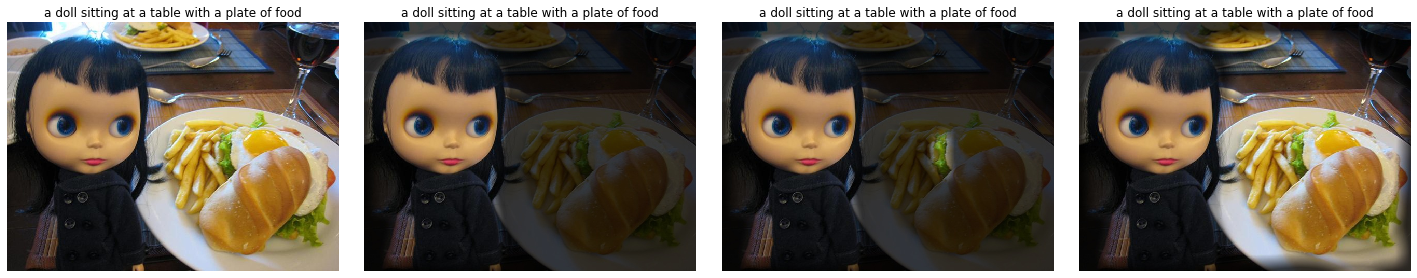

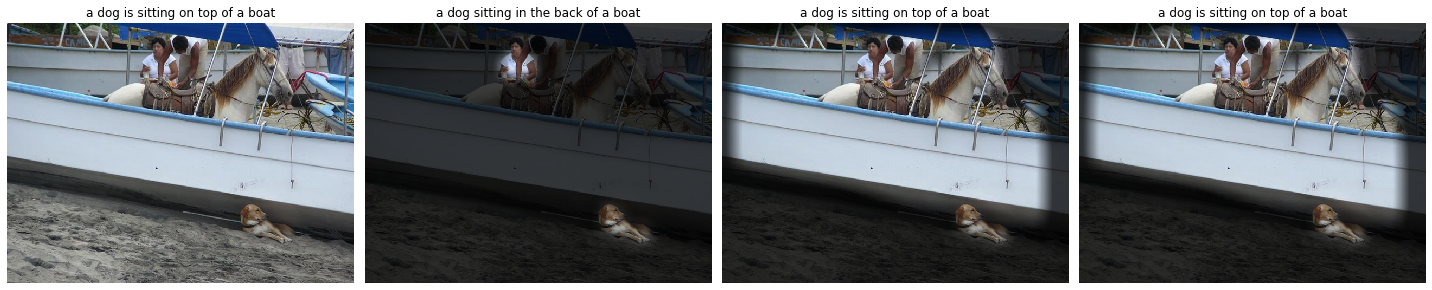

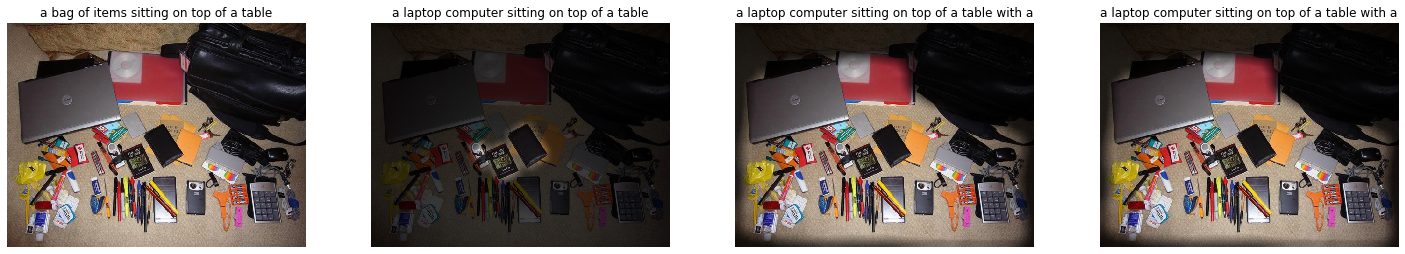

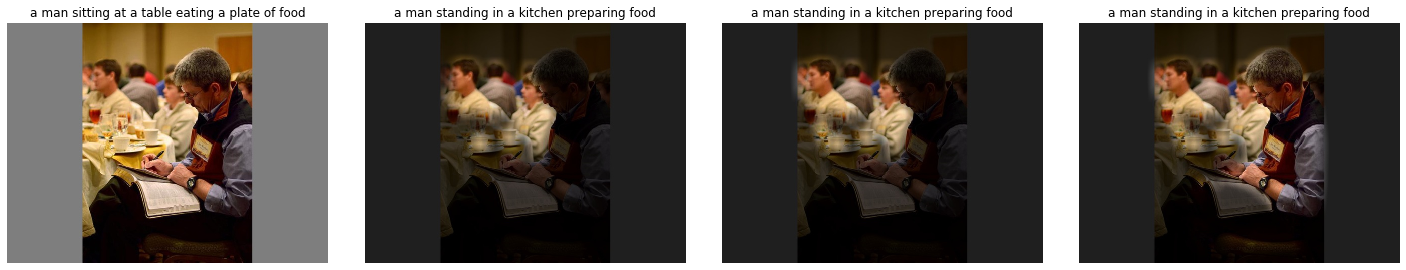

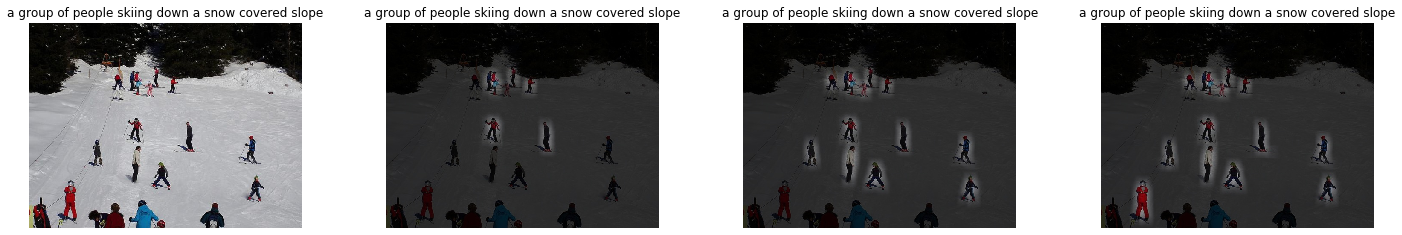

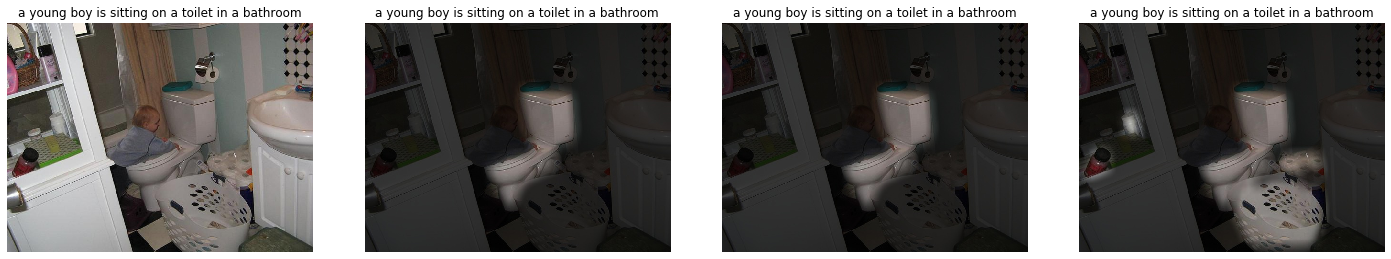

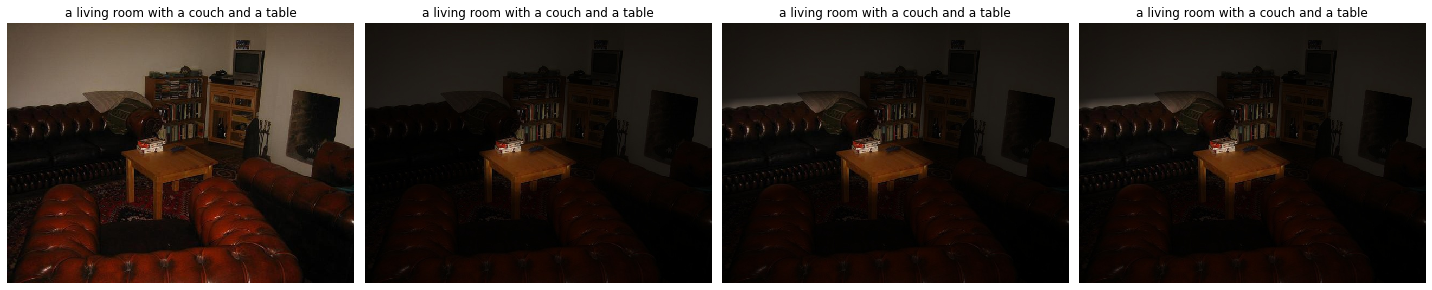

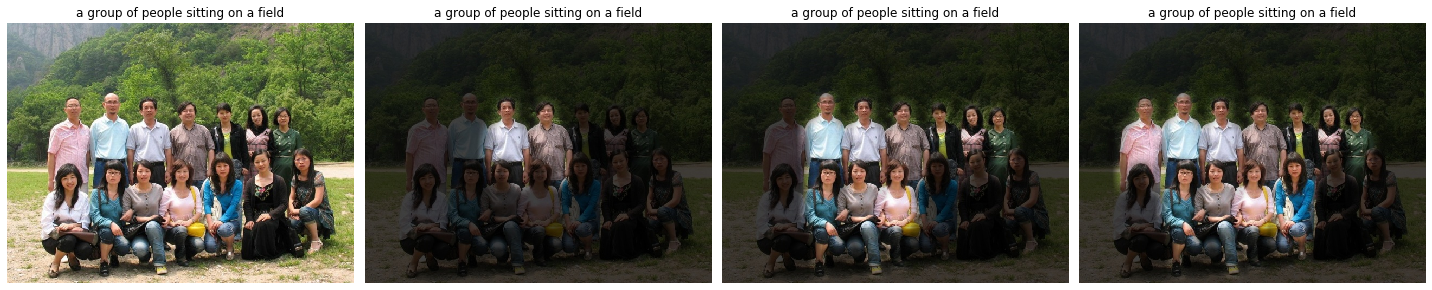

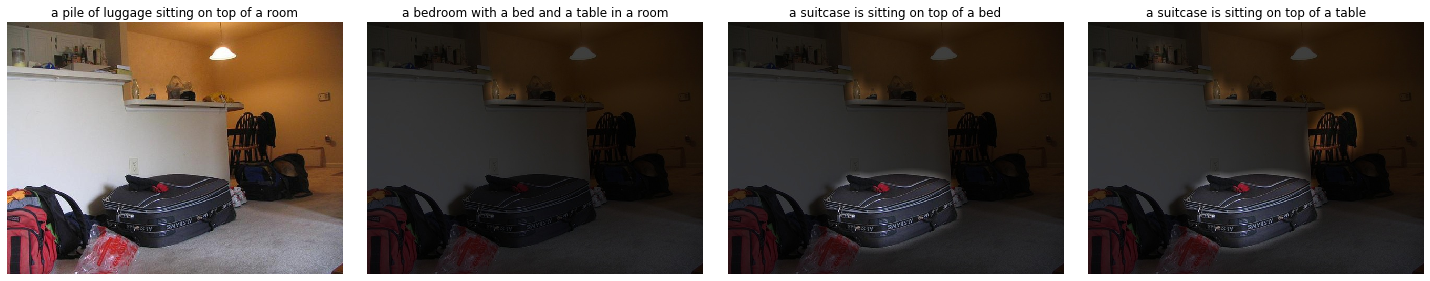

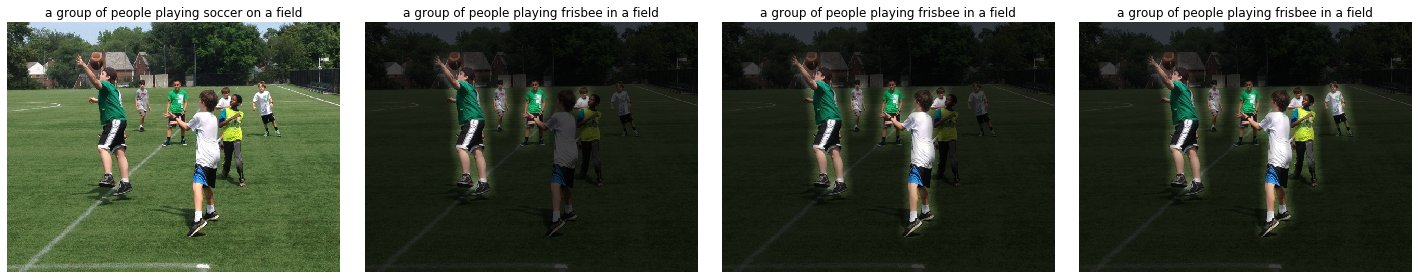

In [14]:
img_sets_to_show = img_sets[:n_results_to_show]

for imname in img_sets_to_show:
    fig,axes = plt.subplots(1,4,figsize=(20,6))
    axes = axes.flatten()
    for ax in axes:
        ax.axis('off')
    for i, time in enumerate(time_points):
        idx = img2idx["{}_{}".format(time,imname)]
        im_info = data[idx]
        imid = im_info['image_id']
        img = cv2.imread(img_path+"img{}.jpg".format(imid))
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(im_info['caption'])
    fig.tight_layout()
    plt.show()